In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import the data
df = pd.read_csv("general_time_error_data_bench.csv")
df2 = pd.read_csv("general_time_error_data_bench_2.csv")
print(df2)

     size  partitions      eps  omega       err         rk      time  \
0     100          10  0.10000    0.1  0.075890   8.000000  0.000105   
1     100          10  0.10000    0.9  0.075890   8.000000  0.000087   
2     100          10  0.01000    0.1  0.008513  14.000000  0.000120   
3     100          10  0.01000    0.9  0.008513  14.000000  0.000109   
4     100          10  0.00100    0.1  0.000667  19.333333  0.000107   
..    ...         ...      ...    ...       ...        ...       ...   
105    10       10000  0.00100    0.9       NaN        NaN       NaN   
106    10       10000  0.00010    0.1       NaN        NaN       NaN   
107    10       10000  0.00010    0.9       NaN        NaN       NaN   
108    10       10000  0.00001    0.1       NaN        NaN       NaN   
109    10       10000  0.00001    0.9       NaN        NaN       NaN   

      err_tight_0  rk_tight_0  time_tight_0  err_tight_1  rk_tight_1  \
0    7.296970e-02        13.0      0.007764     0.020985       

In [129]:
omega =0.1
eps = 1e-5
filtered_df= df[(df["omega"]==omega)&(df["eps"]==eps)]
filtered_df=filtered_df[["partitions","time","time_tight_0","time_tight_1","time_tight_2","time_tight_3"]]
print(filtered_df)

filtered_df2=df2[(df2["omega"]==omega)&(df["eps"]==eps)]
filtered_df2=filtered_df2[["size","time","time_tight_0","time_tight_1","time_tight_2","time_tight_3"]]

slope,intercept = np.polyfit(np.log(filtered_df2['size']), np.log(filtered_df2['time']), 1)
slope2,intercept2 = np.polyfit(np.log(filtered_df2['size']), np.log(filtered_df2['time_tight_1']), 1)


    partitions      time  time_tight_0  time_tight_1  time_tight_2  \
8          500  0.017309      3.674748      1.723522     29.341258   
18         400  0.017384      3.866752      1.406557     21.872024   
28         200  0.018361      4.350206      1.178881      9.767854   
38         100  0.014591      4.467496      0.975907      6.653689   
48          80  0.014635      2.732282      0.788232      4.508050   
58          40  0.014875      0.922628      0.640350      2.816554   
68          20  0.030795      0.833364      0.876507      1.783903   
78          10  0.013444      0.654670      0.887133      1.273225   

    time_tight_3  
8      56.528386  
18     38.132770  
28     12.768355  
38      5.841149  
48      4.535219  
58      2.441939  
68      1.660503  
78      1.398815  


In [ ]:

label_map = {
    'time': 'LAPACK gesdd',
    'time_tight_0': 'Distributed',
    'time_tight_1': 'Incremental',
    'time_tight_2': '2-level Distributed',
    'time_tight_3': '2-level Incremental',
}

markers = ['o', 's', 'd', 's', 'd', '*']
colors = ['k', 'g', 'r', 'c', 'm', 'k']
linestyles = ['-', ':', ':','-.','-.', '--']

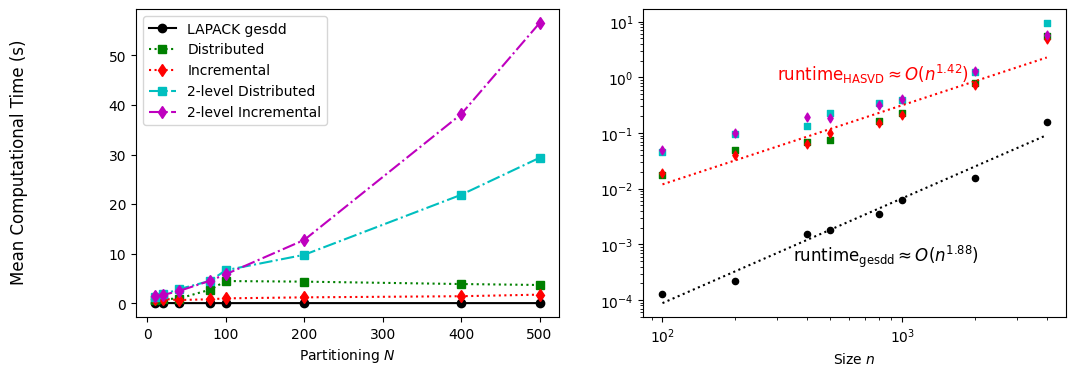

In [131]:
fig=plt.figure(figsize=(12, 4))
fig.supylabel('Mean Computational Time (s)')

ax1 = fig.add_subplot(1,2,1)
for i, col in enumerate(["time","time_tight_0","time_tight_1","time_tight_2","time_tight_3"]):
    marker = markers[i]
    ax1 = filtered_df.plot(
        x='partitions',
        y=col,
        ax=ax1,
        marker=marker,
        color=colors[i % len(colors)],
        linestyle=linestyles[i],
        label=label_map[col],
    )
ax1.set_xlabel("Partitioning $N$")

ax2 = fig.add_subplot(1,2,2)
for i, col in enumerate(["time","time_tight_0","time_tight_1","time_tight_2","time_tight_3"]):
    marker = markers[i]
    ax2 = filtered_df2.plot.scatter(
        x='size',
        y=col,
        ax=ax2,
        marker=marker,
        color=colors[i],
        label=label_map[col],
    )
    
plt.plot(np.linspace(100,4000),np.exp(intercept)*(np.linspace(100,4000)**slope)
    ,color="k",linestyle=":")
plt.text(350, 0.0005, f'$\\text{{runtime}}_{{\\text{{gesdd}}}} \\approx O(n^{{{slope:.2f}}})$', fontsize=12, color='black')

plt.plot(np.linspace(100,4000),np.exp(intercept2)*(np.linspace(100,4000)**slope2)
    ,color="r",linestyle=":")
plt.text(300, 0.9, f'$\\text{{runtime}}_{{\\text{{HASVD}}}} \\approx O(n^{{{slope2:.2f}}})$', fontsize=12, color='red')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylabel(None)
ax2.set_xlabel("Size $n$")

ax2.get_legend().remove()